# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
# ! pip install pandas-visual-analysis
# from pandas_visual_analysis import VisualAnalysis

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('ggplot')

RANDOM_STATE = 4

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [4]:
# !gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
# !gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
# !gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

In [5]:
train = pd.read_csv('./train.csv')

# посмотрим на случайные 10 строк тренировочной выборки
train.sample(10, random_state=RANDOM_STATE)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
5038,2,79.75,164.5,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,1
253,42,105.20,4599.15,Female,1,Yes,No,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),0
4229,19,20.00,377.55,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,0
2717,1,85.45,85.45,Female,0,No,No,Yes,No,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,1
1151,11,55.60,580.8,Female,1,No,No,Yes,Yes,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,0
2007,35,89.65,3161.6,Male,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),0
1051,26,50.35,1277.5,Female,0,No,No,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),0
2588,21,97.35,2119.5,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
131,26,93.85,2381.55,Female,1,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,1
1937,15,64.85,950.75,Male,0,No,Yes,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,0


In [6]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

### Общая информация

In [7]:
# VisualAnalysis(train)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

#### Преобразование типов

Посмотрим на **количественные** признаки:

In [9]:
train[num_cols].dtypes

ClientPeriod         int64
MonthlySpending    float64
TotalSpent          object
dtype: object

Найдем причину, почему столбец *TotalSpent* имеет тип object, хотя, судя по данным, должен иметь тип float.

In [10]:
train['TotalSpent'].sort_values().unique()

array([' ', '100.2', '100.25', ..., '997.65', '998.1', '999.9'],
      dtype=object)

Произведем замену:

In [11]:
train['TotalSpent'] = train['TotalSpent'].replace(' ', np.nan).astype('float')

Посмотрим на **категориальные** признаки:

In [12]:
train[cat_cols].dtypes

Sex                         object
IsSeniorCitizen              int64
HasPartner                  object
HasChild                    object
HasPhoneService             object
HasMultiplePhoneNumbers     object
HasInternetService          object
HasOnlineSecurityService    object
HasOnlineBackup             object
HasDeviceProtection         object
HasTechSupportAccess        object
HasOnlineTV                 object
HasMovieSubscription        object
HasContractPhone            object
IsBillingPaperless          object
PaymentMethod               object
dtype: object

Судя по всему, значения во всех признаках, кроме *IsSeniorCitizen*, представлены в виде строкового описания.

Для удобства приведем признак *IsSeniorCitizen* к виду, аналогичному остальным:

In [13]:
train['IsSeniorCitizen'] = train['IsSeniorCitizen'].replace({0: 'No', 1: 'Yes'}).astype('object')

train[cat_cols] = train[cat_cols].astype('category')

train.dtypes

ClientPeriod                   int64
MonthlySpending              float64
TotalSpent                   float64
Sex                         category
IsSeniorCitizen             category
HasPartner                  category
HasChild                    category
HasPhoneService             category
HasMultiplePhoneNumbers     category
HasInternetService          category
HasOnlineSecurityService    category
HasOnlineBackup             category
HasDeviceProtection         category
HasTechSupportAccess        category
HasOnlineTV                 category
HasMovieSubscription        category
HasContractPhone            category
IsBillingPaperless          category
PaymentMethod               category
Churn                          int64
dtype: object

### Пропуски в данных

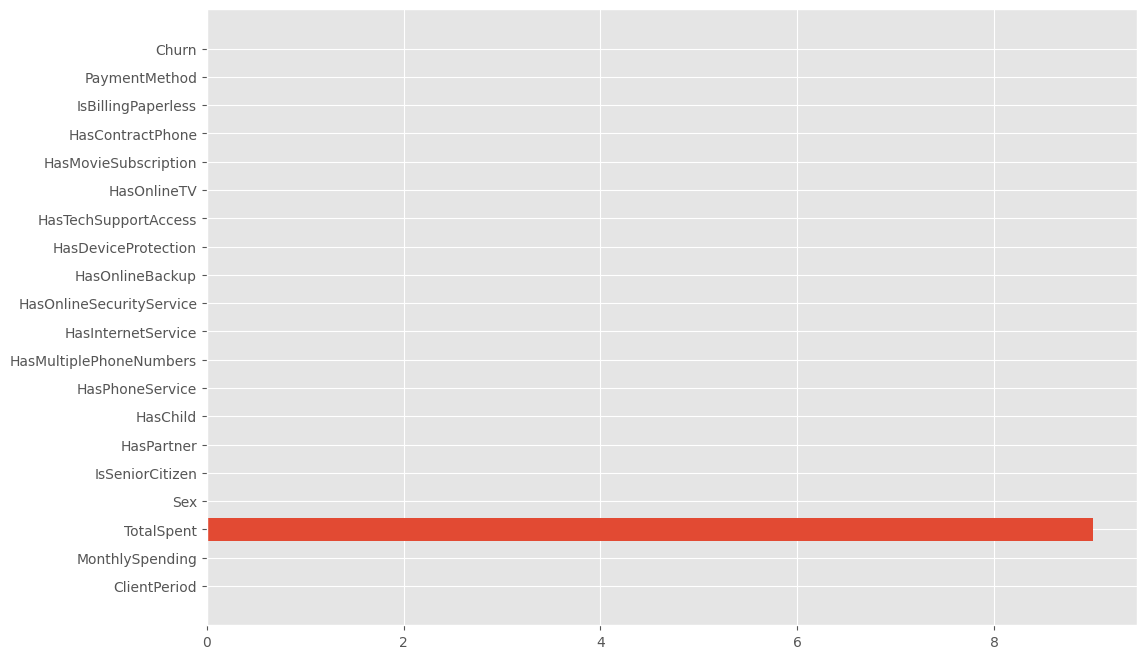

In [14]:
train_isna = train.isna().sum()
plt.figure(figsize=(12, 8))
plt.barh(train_isna.index, train_isna.values)
plt.yticks()
plt.show()

In [15]:
print(f"Доля пропусков в столбце TotalSpent составила: {train_isna.loc['TotalSpent'] / train.shape[0]:.2%}")

Доля пропусков в столбце TotalSpent составила: 0.17%


С учетом малой доли пропусков, можем ими пожертвовать:

In [16]:
train = train.dropna(subset='TotalSpent')

В оставшихся столбцах не наблюдается пропущенных значений, однако это не означает, что они действительно отсутствуют — возможно, они представлены другим значением, аналогично столбцу *TotalSpent*.

В следующем разделе более детально посмотрим на уникальные значения столбцов.

### Дубликаты в данных

In [17]:
train.duplicated().sum()

14

У нас также обнаружилось 14 полных дубликата в тренировочной выборке. А сколько их будет, если мы не возьмем в учет столбец *Churn*?

In [18]:
train.drop(target_col, axis=1).duplicated().sum()

22

Это нам говорит о том, что в тренировочной выборке присутствуют объекты, имеющие идентичное признаковое описание, но разные таргеты. От таких объектов лучше избавиться.

In [19]:
train.duplicated(subset=feature_cols, keep=False).sum()

41

In [20]:
train = train.drop_duplicates(subset=feature_cols, keep=False)

Проверим, что полных дубликатов строк не осталось:

In [21]:
train.duplicated(subset=feature_cols, keep=False).sum()

0

Обновим индексы:

In [22]:
train = train.reset_index(drop=True)

## Анализ данных (3 балла)

1) Для численных признаков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

Посмотрим на **количественные** признаки:

In [23]:
train[num_cols].dtypes

ClientPeriod         int64
MonthlySpending    float64
TotalSpent         float64
dtype: object

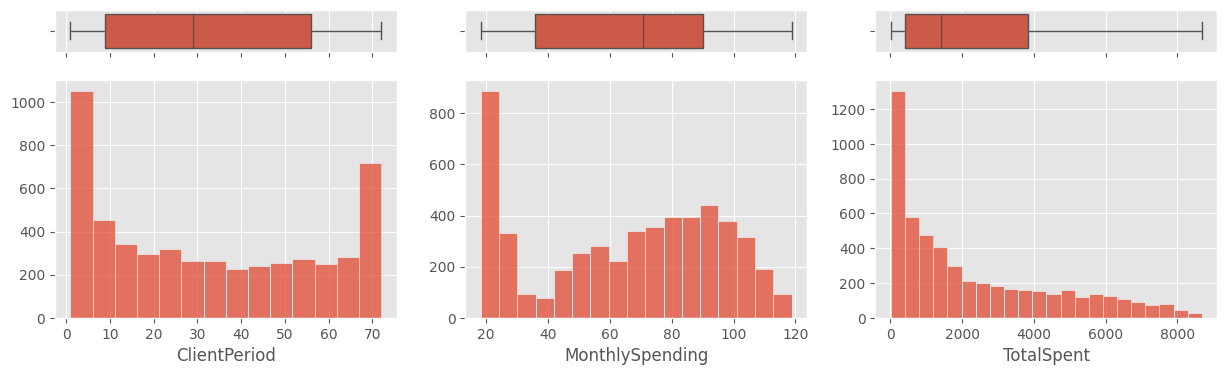

In [24]:
fig, (axes_box, axes_hist) = plt.subplots(nrows=2, ncols=3, figsize=(15, 4), sharex='col', gridspec_kw={'height_ratios': (.15, .85)})

for ax_box, ax_hist, col in zip(axes_box, axes_hist, num_cols):
    sns.boxplot(train[col], orient='h', ax=ax_box)
    sns.histplot(data=train, x=col, ax=ax_hist)
    ax_box.set(xlabel='')
    ax_hist.set(ylabel='')
    
plt.show()

На первый взгляд каких-то аномалий не обнаруживается.

Посмотрим на корреляцию Пирсона:

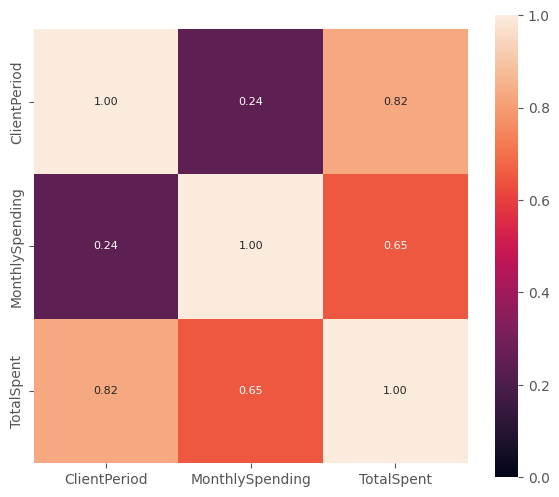

In [25]:
fig, ax = plt.subplots(figsize=(7, 6))

corrmat = train[num_cols].corr()
sns.heatmap(corrmat, cbar=True, square=True, annot=True, fmt='.2f', annot_kws={'size': 8}, vmin=0, vmax=1)
plt.show()

Критически сильной корреляции между количественными признаками не обнаружено.

Посмотрим на **категориальные** признаки:

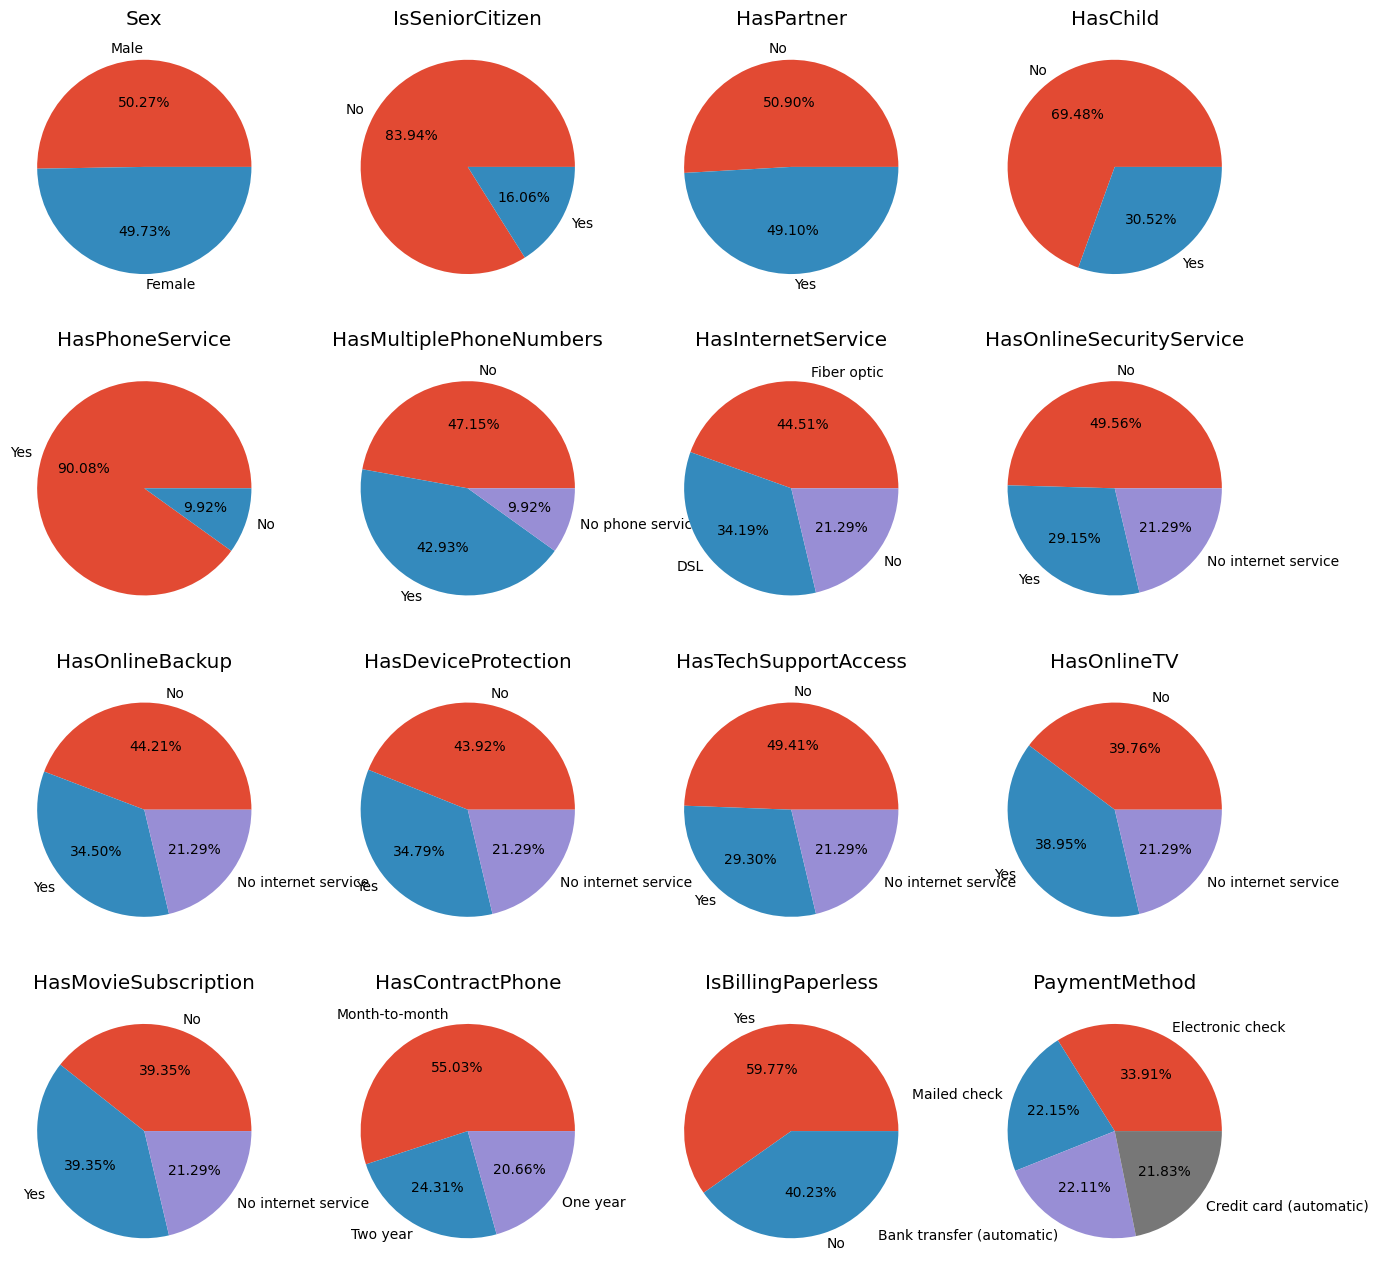

In [26]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

ax = ax.ravel()

for i, col in enumerate(cat_cols):
    data = train[col].value_counts()
    ax[i].set_title(col)
    ax[i].pie(data, autopct="%.2f%%", labels=data.index)
    
plt.show()

Посмотрим на **целевую переменную**:

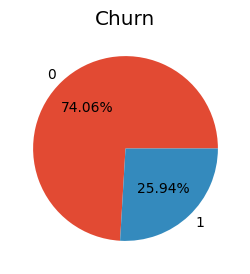

In [27]:
fig, ax = plt.subplots(figsize=(3, 3))

data = train[target_col].value_counts()
ax.set_title(target_col)
ax.pie(data, autopct="%.2f%%", labels=data.index)
    
plt.show()

Видно, что имеется определенный **дисбаланс классов**, однако он не является критичным, и, кажется, **особой проблемы не представляет**.

**(Дополнительно)** Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [28]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.impute import SimpleImputer

In [29]:
X_train, y_train = train[feature_cols], train[target_col]

### Пайплайн обучения

Создадим кастомный предобработчик, повторяющий преобразования, которые мы выполняли с обучающей выборкой. 

*(На самом деле в текущий момент он не имеет особого смысла, так как все преобразования мы делали сразу на всей обучающей выборке без выделения отдельной для валидации, но когда придут новые данные — он облегчит нам жизнь.)*

In [30]:
def simple_preprocessing(X, cat_features):
    X.loc[:, 'TotalSpent'] = X.loc[:, 'TotalSpent'].replace(' ', np.nan).astype('float')
    X.loc[:, 'IsSeniorCitizen'] = X.loc[:, 'IsSeniorCitizen'].replace({0: 'No', 1: 'Yes'}).astype('object')
    X.loc[:, cat_features] = X.loc[:, cat_features].astype('category')
    return X

custom_preprocessor = FunctionTransformer(simple_preprocessing, kw_args={'cat_features': cat_cols})

In [31]:
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-1.)),
    ('scaler', StandardScaler()),
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore')),
])

transformer = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
], remainder='passthrough')

preprocessor = Pipeline(steps=[
    ('custom_preprocessor', custom_preprocessor),
    ('transformer', transformer),
    ('fs', SelectKBest(score_func=f_classif, k='all'))
])

logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression(random_state=RANDOM_STATE))
])

logreg_pipeline

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('custom_preprocessor',
                                  FunctionTransformer(func=<function simple_preprocessing at 0x000001D82000A200>,
                                                      kw_args={'cat_features': ['Sex',
                                                                                'IsSeniorCitizen',
                                                                                'HasPartner',
                                                                                'HasChild',
                                                                                'HasPhoneService',
                                                                                'HasMultiplePhoneNumbers',
                                                                                'HasInternetService',
                                                                                'HasOnlineSecurityService',
                                                                                'HasOnlineBackup',
                                                                                'HasDeviceProtection...
                                                                    'HasPartner',
                                                                    'HasChild',
                                                                    'HasPhoneService',
                                                                    'HasMultiplePhoneNumbers',
                                                                    'HasInternetService',
                                                                    'HasOnlineSecurityService',
                                                                    'HasOnlineBackup',
                                                                    'HasDeviceProtection',
                                                                    'HasTechSupportAccess',
                                                                    'HasOnlineTV',
                                                                    'HasMovieSubscription',
                                                                    'HasContractPhone',
                                                                    'IsBillingPaperless',
                                                                    'PaymentMethod'])])),
                                 ('fs', SelectKBest(k='all'))])),
                ('clf', LogisticRegression(random_state=4))])

### Подбор гиперпараметров

In [32]:
param_grid = {
    'clf__C': [100, 10, 1, 0.1, 0.01, 0.001],
    'clf__class_weight': ['balanced', None],
    'preprocessor__transformer__cat__ohe__drop': ['if_binary', 'first'],
    # 'preprocessor__transformer__num__imputer__strategy': ['mean', 'median', 'constant'], # на самом деле не имеет смысла, так как у нас нет пропусков
    # 'preprocessor__fs__score_func': [f_classif, chi2],
    'preprocessor__fs__k': np.arange(X_train.shape[1]) + 1,
}

gc = GridSearchCV(logreg_pipeline, param_grid, scoring='roc_auc', cv=5, refit=True, n_jobs=-1)
gc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        Pipeline(steps=[('custom_preprocessor',
                                                         FunctionTransformer(func=<function simple_preprocessing at 0x000001D82000A200>,
                                                                             kw_args={'cat_features': ['Sex',
                                                                                                       'IsSeniorCitizen',
                                                                                                       'HasPartner',
                                                                                                       'HasChild',
                                                                                                       'HasPhoneService',
                                                                                                       'HasMultiplePhoneNumbers',
                                                                                                       'HasInternetService',
                                                                                                       'HasOnlineSecurityService',
                                                                                                       'HasOnline...
                                                                                           'PaymentMethod'])])),
                                                        ('fs',
                                                         SelectKBest(k='all'))])),
                                       ('clf',
                                        LogisticRegression(random_state=4))]),
             n_jobs=-1,
             param_grid={'clf__C': [100, 10, 1, 0.1, 0.01, 0.001],
                         'clf__class_weight': ['balanced', None],
                         'preprocessor__fs__k': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'preprocessor__transformer__cat__ohe__drop': ['if_binary',
                                                                       'first']},
             scoring='roc_auc')

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [33]:
gc.best_params_

{'clf__C': 100,
 'clf__class_weight': None,
 'preprocessor__fs__k': 19,
 'preprocessor__transformer__cat__ohe__drop': 'first'}

In [34]:
print(f"Наибольшее среднее значение ROC-AUC на кросс-валидации: {gc.best_score_:.4f}")

Наибольшее среднее значение ROC-AUC на кросс-валидации: 0.8432


## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [35]:
from catboost import CatBoostClassifier

cb_clf = CatBoostClassifier(
    n_estimators=500, 
    silent=True,
    cat_features=cat_cols,
    eval_metric='AUC',
    random_state=RANDOM_STATE
)

In [37]:
param_grid = {
        'depth': [3, 4, 5],
        'l2_leaf_reg': np.linspace(3, 3.5, 5), 
}

cv_res = cb_clf.grid_search(
        param_grid,
        X_train,
        y_train,
        stratified=True,
        cv=3,
        refit=True,
    )


bestTest = 0.8603317279
bestIteration = 473

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8603317	best: 0.8603317 (0)	total: 11s	remaining: 2m 34s

bestTest = 0.8602850582
bestIteration = 494

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8602851	best: 0.8603317 (0)	total: 21.3s	remaining: 2m 18s

bestTest = 0.8616058094
bestIteration = 438

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8616058	best: 0.8616058 (2)	total: 31.8s	remaining: 2m 7s

bestTest = 0.8611437799
bestIteration = 479

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8611438	best: 0.8616058 (2)	total: 42.2s	remaining: 1m 56s

be

In [38]:
cb_clf.is_fitted()

True

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

In [39]:
cv_res['params']

{'depth': 4, 'l2_leaf_reg': 3.375}

In [40]:
cv_results = pd.DataFrame(cv_res['cv_results'])
cv_results

,iterations,test-AUC-mean,test-AUC-std,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std
0,0,0.761910,0.004116,0.676654,0.000562,0.676219,0.000355
1,1,0.810234,0.002582,0.660348,0.000449,0.659895,0.000798
2,2,0.814702,0.005071,0.644596,0.000630,0.644094,0.001185
3,3,0.814675,0.008596,0.629995,0.000421,0.629326,0.000581
4,4,0.817008,0.005920,0.617209,0.001112,0.616454,0.001055
...,...,...,...,...,...,...,...
495,495,0.845405,0.002137,0.412292,0.002437,0.371229,0.002037
496,496,0.845422,0.002126,0.412273,0.002422,0.371198,0.002063
497,497,0.845393,0.002163,0.412297,0.002446,0.371159,0.002090
498,498,0.845441,0.002189,0.412289,0.002490,0.371046,0.002047


In [41]:
print(f"Наибольшее среднее значение ROC-AUC на кросс-валидации: {cv_results['test-AUC-mean'].max():.4f}")

Наибольшее среднее значение ROC-AUC на кросс-валидации: 0.8460


In [45]:
# best_params = {'depth': 4, 'l2_leaf_reg': 3.375}
# best_score = 0.8460

# Предсказания

In [43]:
best_model = cb_clf

In [46]:
X_test = pd.read_csv('./test.csv')
X_test = custom_preprocessor.transform(X_test)

C:\Users\aweis\AppData\Local\Temp\ipykernel_22984\2620895092.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['No' 'Yes' 'No' ... 'No' 'No' 'No']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, 'IsSeniorCitizen'] = X.loc[:, 'IsSeniorCitizen'].replace({0: 'No', 1: 'Yes'}).astype('object')


In [47]:
submission = pd.read_csv('./submission.csv')
submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv')

Лучшее решение отправьте в Stepik.